# EDA CropData

First we need to import all the libraries needed for this EDA.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import category_encoders as ce

Then we read the cropdata file. The cropdata file has multiple sheets so we also need to specify wich sheet we want to use. We have chosen the CropStats sheet because it has all the cropdata statistics.

In [2]:
# Load a sheet into a DataFrame by its name
df = pd.read_excel('files/food-twentieth-century-crop-statistics-1900-2017-xlsx.xlsx', sheet_name="CropStats")

Now we look at the basic info of this dataset. Here we can see wich columns are present in the dataset.

In [3]:
# See basic info about our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36707 entries, 0 to 36706
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           36707 non-null  int64  
 1   Harvest_year         36707 non-null  int64  
 2   admin0               36707 non-null  object 
 3   admin1               33716 non-null  object 
 4   crop                 36707 non-null  object 
 5   hectares (ha)        35084 non-null  float64
 6   production (tonnes)  34709 non-null  float64
 7   year                 36707 non-null  int64  
 8   yield(tonnes/ha)     34694 non-null  float64
 9   admin2               0 non-null      float64
 10  notes                5641 non-null   object 
dtypes: float64(4), int64(3), object(4)
memory usage: 3.1+ MB


## Drop columns we don't need.

First of all we will drop the columns that have no value for us. The Unnamed: 0 is just a column with id values of all the lines, it is not usefull to make predictions. In the info of the dataset we can see that admin2 is never filled in so we will not be needing that column. And lastly the notes are also not verry usefull to make predictions with and they are rarely filled in.

In [4]:
df=df.drop(['Unnamed: 0','admin2','notes'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36707 entries, 0 to 36706
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Harvest_year         36707 non-null  int64  
 1   admin0               36707 non-null  object 
 2   admin1               33716 non-null  object 
 3   crop                 36707 non-null  object 
 4   hectares (ha)        35084 non-null  float64
 5   production (tonnes)  34709 non-null  float64
 6   year                 36707 non-null  int64  
 7   yield(tonnes/ha)     34694 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 2.2+ MB


In the dataset info we can also see that admin1 or region is also missing a few values. But if we look at the graph we can clearly see that 92% of these values is filled in and 8% is not. So we will not drop this because this can be usefull for making predictions.

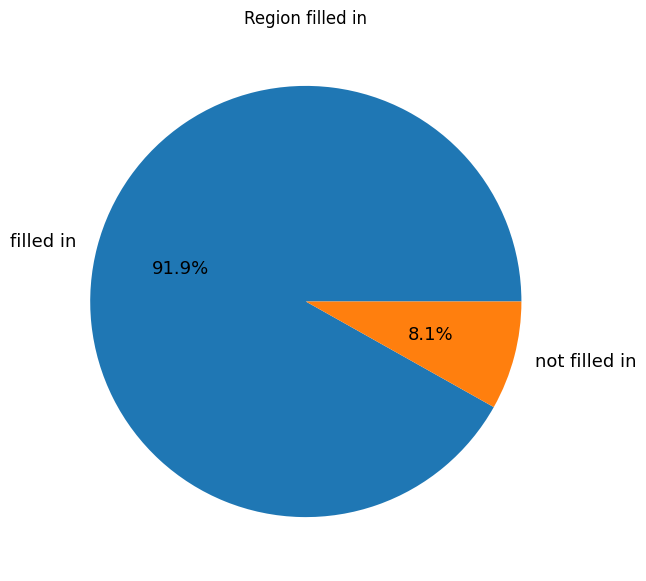

In [5]:
sizes = [df['admin1'].count(),len(df)-df['admin1'].count()]
plt.figure(figsize=(7,7))
plt.title('Region filled in')
plt.pie(sizes,labels=['filled in','not filled in'],autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

If we drop all the rows where there are no regions ten some countries like Belgium will be dropped entirely. So this might not be optimal.

In [6]:
df.loc[df['admin0'] == 'Belgium']

,Harvest_year,admin0,admin1,crop,hectares (ha),production (tonnes),year,yield(tonnes/ha)
116,1902,Belgium,NaN,wheat,NaN,NaN,1902,NaN
117,1903,Belgium,NaN,wheat,NaN,NaN,1903,NaN
118,1904,Belgium,NaN,wheat,NaN,NaN,1904,NaN
119,1905,Belgium,NaN,wheat,NaN,NaN,1905,2.0700
120,1906,Belgium,NaN,wheat,NaN,NaN,1906,2.3500
...,...,...,...,...,...,...,...,...
227,2013,Belgium,NaN,wheat,201854.0,1803550.0,2013,8.9349
228,2014,Belgium,NaN,wheat,211900.0,1994600.0,2014,9.4129
229,2015,Belgium,NaN,wheat,201628.0,2019347.0,2015,10.0152
230,2016,Belgium,NaN,wheat,206284.0,1400074.0,2016,6.7871


Here we can see that there are no regions available in Belgium. (This is not the only country where this is the case)

In [7]:
df_BelgiumNullValues=df.loc[df['admin0'] == 'Belgium']
print('The amount of filled in regions in Belgium:',df_BelgiumNullValues['admin1'].count())

The amount of filled in regions in Belgium: 0


So the best option for us is to replace all of the regions where there are null values with the country itself.

In [8]:
df_replaceAdmin1 = df.copy()
df_replaceAdmin1['admin1'].fillna(df['admin0'], inplace=True)
df_replaceAdmin1

,Harvest_year,admin0,admin1,crop,hectares (ha),production (tonnes),year,yield(tonnes/ha)
0,1902,Austria,Austria,wheat,NaN,NaN,1902,1.310000
1,1903,Austria,Austria,wheat,NaN,NaN,1903,1.470000
2,1904,Austria,Austria,wheat,NaN,NaN,1904,1.270000
3,1905,Austria,Austria,wheat,NaN,NaN,1905,1.330000
4,1906,Austria,Austria,wheat,NaN,NaN,1906,1.280000
...,...,...,...,...,...,...,...,...
36702,2013,China,zhejiang,wheat,75520.0,278300.0,2013,3.685117
36703,2014,China,zhejiang,wheat,82120.0,309500.0,2014,3.768875
36704,2015,China,zhejiang,wheat,89800.0,351300.0,2015,3.912027
36705,2016,China,zhejiang,wheat,76590.0,253900.0,2016,3.315054


In [9]:
df_transformed = df_replaceAdmin1.copy()

Here we are going to check if there are rows where we can calculate the yield by using the hectares and the production.

In [10]:
df_transformed.loc[df_transformed['hectares (ha)'].notna()][df_transformed['production (tonnes)'].notna()][df_transformed['yield(tonnes/ha)'].isna()][df_transformed['hectares (ha)'] != 0]

C:\Users\kieran\AppData\Local\Temp\ipykernel_57392\1479177890.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_transformed.loc[df_transformed['hectares (ha)'].notna()][df_transformed['production (tonnes)'].notna()][df_transformed['yield(tonnes/ha)'].isna()][df_transformed['hectares (ha)'] != 0]


,Harvest_year,admin0,admin1,crop,hectares (ha),production (tonnes),year,yield(tonnes/ha)
2460,2017,Australia,Northern Territory,wheat,1.120000e+02,0.0,2017,NaN
2593,2005,Australia,Australian Capital Territory,wheat,2.000000e+02,0.0,2005,NaN
2594,2006,Australia,Australian Capital Territory,wheat,1.000000e+02,0.0,2006,NaN
2595,2007,Australia,Australian Capital Territory,wheat,1.000000e+02,0.0,2007,NaN
2596,2008,Australia,Australian Capital Territory,wheat,1.000000e+02,0.0,2008,NaN
...,...,...,...,...,...,...,...,...
34542,1941,China,yunnan,maize,2.860667e+05,0.0,1941,NaN
34628,1940,China,zhejiang,maize,7.873333e+04,0.0,1940,NaN
34629,1941,China,zhejiang,maize,8.013333e+04,0.0,1941,NaN
34897,1948,China,gansu,wheat,1.189600e+06,0.0,1948,NaN


We have calculated the yield values where the hectares and production were not null.

In [11]:
for index, row in df_transformed.iterrows():
    if pd.notna(row['hectares (ha)']) and pd.notna(row['production (tonnes)']) and pd.isna(row['yield(tonnes/ha)']) and row['hectares (ha)'] != 0:
        df_transformed.at[index, 'yield(tonnes/ha)'] = row['production (tonnes)'] / row['hectares (ha)']
df_transformed

,Harvest_year,admin0,admin1,crop,hectares (ha),production (tonnes),year,yield(tonnes/ha)
0,1902,Austria,Austria,wheat,NaN,NaN,1902,1.310000
1,1903,Austria,Austria,wheat,NaN,NaN,1903,1.470000
2,1904,Austria,Austria,wheat,NaN,NaN,1904,1.270000
3,1905,Austria,Austria,wheat,NaN,NaN,1905,1.330000
4,1906,Austria,Austria,wheat,NaN,NaN,1906,1.280000
...,...,...,...,...,...,...,...,...
36702,2013,China,zhejiang,wheat,75520.0,278300.0,2013,3.685117
36703,2014,China,zhejiang,wheat,82120.0,309500.0,2014,3.768875
36704,2015,China,zhejiang,wheat,89800.0,351300.0,2015,3.912027
36705,2016,China,zhejiang,wheat,76590.0,253900.0,2016,3.315054


Here we can see that the yield is 0. this could be because the crops where destroyed.

In [12]:
df_transformed.loc[df_transformed['yield(tonnes/ha)'] == 0]

,Harvest_year,admin0,admin1,crop,hectares (ha),production (tonnes),year,yield(tonnes/ha)
2460,2017,Australia,Northern Territory,wheat,1.120000e+02,0.0,2017,0.0
2593,2005,Australia,Australian Capital Territory,wheat,2.000000e+02,0.0,2005,0.0
2594,2006,Australia,Australian Capital Territory,wheat,1.000000e+02,0.0,2006,0.0
2595,2007,Australia,Australian Capital Territory,wheat,1.000000e+02,0.0,2007,0.0
2596,2008,Australia,Australian Capital Territory,wheat,1.000000e+02,0.0,2008,0.0
...,...,...,...,...,...,...,...,...
34542,1941,China,yunnan,maize,2.860667e+05,0.0,1941,0.0
34628,1940,China,zhejiang,maize,7.873333e+04,0.0,1940,0.0
34629,1941,China,zhejiang,maize,8.013333e+04,0.0,1941,0.0
34897,1948,China,gansu,wheat,1.189600e+06,0.0,1948,0.0


Where the yield was not filled in, we were able to fill it in using backwards fill. We have noticed that most missing values occur in the earlier years. That is why we have opted for backwards fill so that when a country is changed, the other country is taken into account as accurately as possible.

In [13]:
df_transformed['yield(tonnes/ha)'].bfill(inplace=True)

df_transformed.head(20)

,Harvest_year,admin0,admin1,crop,hectares (ha),production (tonnes),year,yield(tonnes/ha)
0,1902,Austria,Austria,wheat,NaN,NaN,1902,1.31
1,1903,Austria,Austria,wheat,NaN,NaN,1903,1.47
2,1904,Austria,Austria,wheat,NaN,NaN,1904,1.27
3,1905,Austria,Austria,wheat,NaN,NaN,1905,1.33
4,1906,Austria,Austria,wheat,NaN,NaN,1906,1.28
5,1907,Austria,Austria,wheat,NaN,NaN,1907,1.37
6,1908,Austria,Austria,wheat,NaN,NaN,1908,1.36
7,1909,Austria,Austria,wheat,NaN,NaN,1909,1.35
8,1910,Austria,Austria,wheat,NaN,NaN,1910,1.18
9,1911,Austria,Austria,wheat,NaN,NaN,1911,1.37


Now hectares and production do not have much added value because the yield is what we want to predict.

In [14]:
df_transformed=df_transformed.drop(['hectares (ha)','production (tonnes)'], axis=1)
df_transformed

,Harvest_year,admin0,admin1,crop,year,yield(tonnes/ha)
0,1902,Austria,Austria,wheat,1902,1.310000
1,1903,Austria,Austria,wheat,1903,1.470000
2,1904,Austria,Austria,wheat,1904,1.270000
3,1905,Austria,Austria,wheat,1905,1.330000
4,1906,Austria,Austria,wheat,1906,1.280000
...,...,...,...,...,...,...
36702,2013,China,zhejiang,wheat,2013,3.685117
36703,2014,China,zhejiang,wheat,2014,3.768875
36704,2015,China,zhejiang,wheat,2015,3.912027
36705,2016,China,zhejiang,wheat,2016,3.315054


By viewing this graph we can sea that in the early years there was not much of an increase in yield. But somewere around 1950 the avarage yeals started to rise.

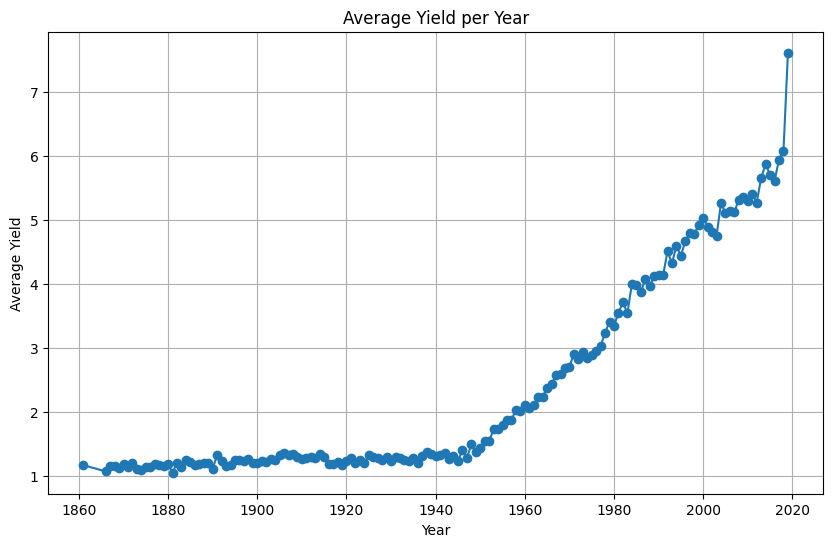

In [19]:
average_yield_per_year = df.groupby('year')['yield(tonnes/ha)'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(average_yield_per_year['year'], average_yield_per_year['yield(tonnes/ha)'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average Yield')
plt.title('Average Yield per Year')
plt.grid(True)
plt.show()